<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB3/blob/main/6351071072_LAB3_BAI1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- CELL 1: KHAI BÁO THƯ VIỆN ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Các module từ sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Các module từ Keras/Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

print("Đã import xong thư viện!")

Đã import xong thư viện!


In [2]:
# --- CELL 2: CÂU A (Đọc dữ liệu) ---
print("Nguyễn Đức Trung - 6351071072")

iris = load_iris()
X = iris.data
y = iris.target

print("Đã load dữ liệu Iris thành công.")

Nguyễn Đức Trung - 6351071072
Đã load dữ liệu Iris thành công.


In [3]:
# --- CELL 3: CÂU B (Khảo sát dữ liệu) ---
print("Nguyễn Đức Trung - 6351071072")

print("Feature names:", iris.feature_names)
print("Target names :", iris.target_names)

print(f"Kích thước X: {X.shape}")
print(f"Kích thước y: {y.shape}")

print("\n5 mẫu dữ liệu đầu tiên (X):\n", X[:5])
print("5 nhãn đầu tiên (y):", y[:5])

df = pd.DataFrame(X, columns=iris.feature_names)
print("\nBảng thống kê mô tả:")
display(df.describe())

Nguyễn Đức Trung - 6351071072
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names : ['setosa' 'versicolor' 'virginica']
Kích thước X: (150, 4)
Kích thước y: (150,)

5 mẫu dữ liệu đầu tiên (X):
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
5 nhãn đầu tiên (y): [0 0 0 0 0]

Bảng thống kê mô tả:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# --- CELL 4: CÂU C (Chuẩn hóa về [0,1]) ---
print("Nguyễn Đức Trung - 6351071072")

max_values = X.max(axis=0)

X_normalized = X / max_values

print("Giá trị lớn nhất của từng cột:", max_values)
print("\n5 dòng dữ liệu sau khi chuẩn hóa:\n", X_normalized[:5])

Nguyễn Đức Trung - 6351071072
Giá trị lớn nhất của từng cột: [7.9 4.4 6.9 2.5]

5 dòng dữ liệu sau khi chuẩn hóa:
 [[0.64556962 0.79545455 0.20289855 0.08      ]
 [0.62025316 0.68181818 0.20289855 0.08      ]
 [0.59493671 0.72727273 0.1884058  0.08      ]
 [0.58227848 0.70454545 0.2173913  0.08      ]
 [0.63291139 0.81818182 0.20289855 0.08      ]]


In [5]:
# --- CELL 5: CÂU D (Chia Train/Test tỷ lệ 8:2) ---
print("Nguyễn Đức Trung - 6351071072")

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized,
    y,
    test_size=0.2,
    random_state=42
)

print(f"Số mẫu Train: {X_train.shape[0]}")
print(f"Số mẫu Test : {X_test.shape[0]}")

Nguyễn Đức Trung - 6351071072
Số mẫu Train: 120
Số mẫu Test : 30


In [8]:
# --- CELL 6: HÀM HIỂN THỊ KẾT QUẢ (Dùng chung) ---
print("Nguyễn Đức Trung - 6351071072")

def show_evaluation(model_name, y_true, y_pred):
    print(f"=== KẾT QUẢ: {model_name} ===")


    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}\n")


    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=iris.target_names))


    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Thực tế')
    plt.xlabel('Dự đoán')
    plt.show()

print("Đã khai báo hàm show_evaluation.")

Nguyễn Đức Trung - 6351071072
Đã khai báo hàm show_evaluation.


Nguyễn Đức Trung - 6351071072
=== KẾT QUẢ: Decision Tree ===
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



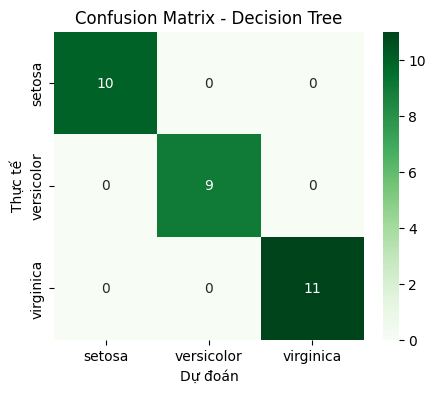

In [9]:
# --- CELL 7: CÂU E (Decision Tree) ---
print("Nguyễn Đức Trung - 6351071072")

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

show_evaluation("Decision Tree", y_test, y_pred_dt)

Nguyễn Đức Trung - 6351071072
=== KẾT QUẢ: Naïve Bayes ===
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



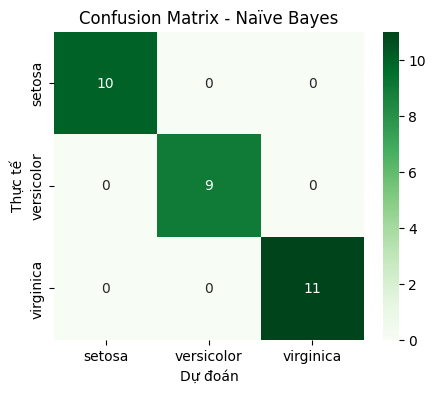

In [10]:
# --- CELL 8: CÂU F (Naïve Bayes) ---
print("Nguyễn Đức Trung - 6351071072")

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

show_evaluation("Naïve Bayes", y_test, y_pred_nb)

Nguyễn Đức Trung - 6351071072
=== KẾT QUẢ: K Nearest Neighbors ===
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



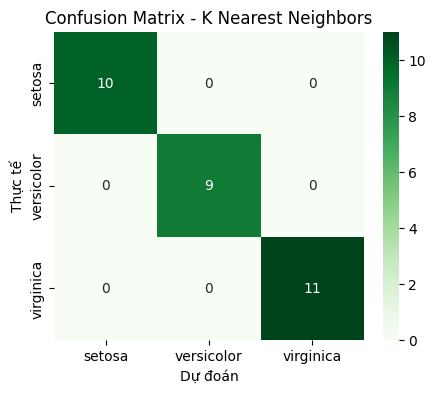

In [11]:
# --- CELL 9: CÂU G (KNN) ---
print("Nguyễn Đức Trung - 6351071072")

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

show_evaluation("K Nearest Neighbors", y_test, y_pred_knn)

Nguyễn Đức Trung - 6351071072
Đang huấn luyện Neural Network...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4832 - loss: 1.0926
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6708 - loss: 0.9393
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6915 - loss: 0.7760
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6652 - loss: 0.6634
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7672 - loss: 0.5092
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9680 - loss: 0.4351
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9477 - loss: 0.3886
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9749 - loss: 0.3416
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9660 - loss: 0.2854
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9640 - loss: 0.2869
Epoch 11/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9655 - loss: 0.2554
Epoch 12/100
120/120 ━━━━━━━━━━━━━━━━━━━━

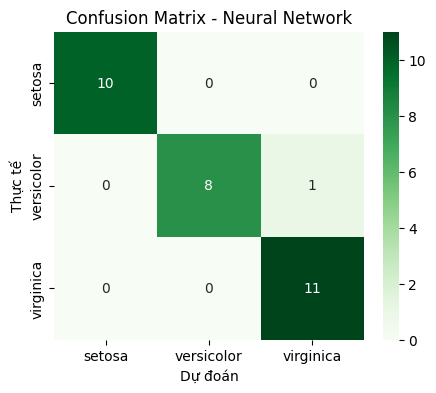

In [12]:
# --- CELL 10: CÂU H (Neural Network) ---
print("Nguyễn Đức Trung - 6351071072")

model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(4,)))

model.add(Dense(20, activation='relu'))

model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Đang huấn luyện Neural Network...")
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

y_pred_prob = model.predict(X_test)
y_pred_nn = np.argmax(y_pred_prob, axis=1)

show_evaluation("Neural Network", y_test, y_pred_nn)

In [13]:
# --- CELL 11: CÂU I (Dự đoán 3 mẫu mới) ---
print("Nguyễn Đức Trung - 6351071072")

new_data = np.array([
    [6.2, 2.9, 4.3, 1.3],
    [5.1, 3.5, 1.4, 0.2],
    [7.3, 2.8, 6.4, 2.1]
])

new_data_norm = new_data / max_values

print("Dữ liệu mới (sau khi chuẩn hóa):\n", new_data_norm)
print("-" * 30)

pred_dt = dt_model.predict(new_data_norm)
print(f"Decision Tree : {iris.target_names[pred_dt]}")

pred_nb = nb_model.predict(new_data_norm)
print(f"Naïve Bayes   : {iris.target_names[pred_nb]}")

pred_knn = knn_model.predict(new_data_norm)
print(f"KNN           : {iris.target_names[pred_knn]}")

pred_nn_prob = model.predict(new_data_norm)
pred_nn = np.argmax(pred_nn_prob, axis=1)
print(f"Neural Network: {iris.target_names[pred_nn]}")

Nguyễn Đức Trung - 6351071072
Dữ liệu mới (sau khi chuẩn hóa):
 [[0.78481013 0.65909091 0.62318841 0.52      ]
 [0.64556962 0.79545455 0.20289855 0.08      ]
 [0.92405063 0.63636364 0.92753623 0.84      ]]
------------------------------
Decision Tree : ['versicolor' 'setosa' 'virginica']
Naïve Bayes   : ['versicolor' 'setosa' 'virginica']
KNN           : ['versicolor' 'setosa' 'virginica']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Neural Network: ['versicolor' 'setosa' 'virginica']
